# Importing Libraries

In [1]:
import re
import pandas as pd
from urllib.parse import urlparse
from collections import Counter
from googlesearch import search
from sklearn.preprocessing import LabelEncoder
from tld import get_tld
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Data Visualization

In [2]:
data = pd.read_csv("malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
data.shape

(651191, 2)

In [4]:
data["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Text(0, 0.5, 'Number Of URLs')

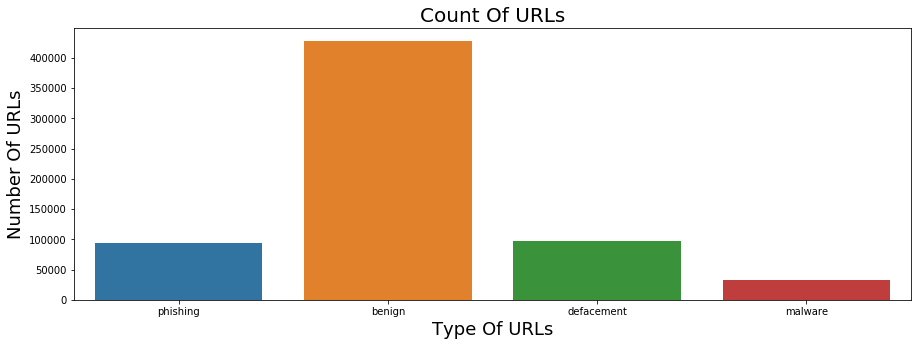

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x='type',data=data)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

# Feature Extraction

In [6]:
def ip_addr(url):
    match = re.search(
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
            '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  
            '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' 
            '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  
    if match:
        return 1
    return 0

data['use_of_ip'] = data['url'].apply(lambda i: ip_addr(i))

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    return 0

data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

In [7]:
data.head()

,url,type,use_of_ip,abnormal_url
0,br-icloud.com.br,phishing,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1


In [8]:
data['count.'] = data['url'].apply(lambda i: i.count('.'))
data['count_www'] = data['url'].apply(lambda i: i.count('www'))
data['count@'] = data['url'].apply(lambda i: i.count('@'))

In [9]:
data.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@
0,br-icloud.com.br,phishing,0,0,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0


In [10]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

data['count_dir'] = data['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

data['count_embed_domian'] = data['url'].apply(lambda i: no_of_embed(i))

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    return 0

data['short_url'] = data['url'].apply(lambda i: shortening_service(i))

In [11]:
data.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0


In [12]:
data['counthttps'] = data['url'].apply(lambda i : i.count('https'))
data['counthttp'] = data['url'].apply(lambda i : i.count('http'))
data['count%'] = data['url'].apply(lambda i: i.count('%'))
data['count?'] = data['url'].apply(lambda i: i.count('?'))
data['count-'] = data['url'].apply(lambda i: i.count('-'))
data['count='] = data['url'].apply(lambda i: i.count('='))

In [13]:
data.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,short_url,counthttps,counthttp,count%,count?,count-,count=
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,0,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,0,1,0,1,1,4
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,0,1,0,1,1,3


In [14]:
data['url_length'] = data['url'].apply(lambda i: len(str(i)))
data['hostname_length'] = data['url'].apply(lambda i: len(urlparse(i).netloc))

In [15]:
data.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,short_url,counthttps,counthttp,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [16]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
    
data['sus_url'] = data['url'].apply(lambda i: suspicious_words(i))

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data['fd_length'] = data['url'].apply(lambda i: fd_length(i))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

data['tld'] = data['url'].apply(lambda i: get_tld(i,fail_silently=True))
data['tld_length'] = data['tld'].apply(lambda i: tld_length(i))
data = data.drop("tld",1)

In [17]:
data.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,short_url,...,counthttp,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,...,0,0,0,1,0,16,0,0,0,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,...,0,0,0,0,0,35,0,0,5,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,...,0,0,0,0,0,31,0,0,7,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,...,1,0,1,1,4,88,21,0,9,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,...,1,0,1,1,3,235,23,0,9,3


In [18]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

data['count_digits']= data['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

data['count_letters']= data['url'].apply(lambda i: letter_count(i))
data.head()

,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,short_url,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count_digits,count_letters
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,...,1,1,4,88,21,0,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,...,1,1,3,235,23,0,9,3,22,199


# Label Encoding

In [19]:
data["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [20]:
'''
0 - benign
1 - defacement
2 - phishing
3 - malware
'''

'\n0 - benign\n1 - defacement\n2 - phishing\n3 - malware\n'

In [21]:
lb_make = LabelEncoder()
data["type_code"] = lb_make.fit_transform(data["type"])
data["type_code"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

In [22]:
data.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count_www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url', 'counthttps',
       'counthttp', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count_digits',
       'count_letters', 'type_code'],
      dtype='object')

In [23]:
data.to_csv('processed_data.csv', columns = ['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count_www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url','counthttps', 'counthttp',
       'count%', 'count?', 'count-', 'count=','url_length', 'hostname_length', 'sus_url', 'fd_length',
       'tld_length', 'count_digits', 'count_letters', 'type_code'])

In [24]:
df = pd.read_csv('processed_data.csv')
df.head()

,Unnamed: 0,url,type,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,...,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count_digits,count_letters,type_code
0,0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,...,1,0,16,0,0,0,-1,0,13,3
1,1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,...,0,0,35,0,0,5,-1,1,29,0
2,2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,...,0,0,31,0,0,7,-1,1,25,0
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,...,1,4,88,21,0,9,2,7,63,1
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,...,1,3,235,23,0,9,3,22,199,1


In [25]:
X = df[['use_of_ip', 'abnormal_url', 'count.', 'count_www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url','counthttps', 'counthttp',
       'count%', 'count?', 'count-', 'count=','url_length', 'hostname_length', 'sus_url', 'fd_length',
       'tld_length', 'count_digits', 'count_letters']]

y = df['type_code']

In [26]:
X.head()

,use_of_ip,abnormal_url,count.,count_www,count@,count_dir,count_embed_domian,short_url,counthttps,counthttp,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count_digits,count_letters
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199


In [27]:
y.head()

0    3
1    0
2    0
3    1
4    1
Name: type_code, dtype: int64

# Splitting the Data for Training

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(520952, 21) (520952,)
(130239, 21) (130239,)


In [29]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], va = 'top',horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
def GNB(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    gnb_pred = gnb.predict(X_test)
    gnb_score = accuracy_score(y_test, gnb_pred)

    print(gnb_score)
    
    cm = confusion_matrix(y_test, gnb_pred, labels=[0,1,2,3])
    plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

0.8152473529434348
Confusion matrix, without normalization


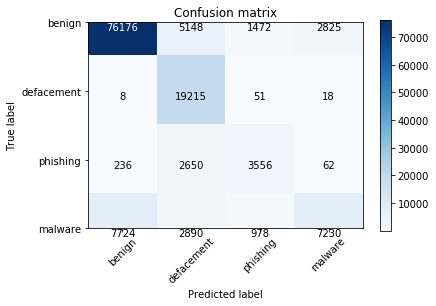

In [33]:
GNB(X_train, y_train, X_test, y_test)

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
def DTClassifier(X_train, y_train, X_test, y_test):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    
    dtc_pred = dtc.predict(X_test)
    dtc_score = accuracy_score(y_test, dtc_pred)
    
    print(dtc_score)
    
    cm = confusion_matrix(y_test, dtc_pred, labels=[0,1,2,3])
    plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

0.9575012093151821
Confusion matrix, without normalization


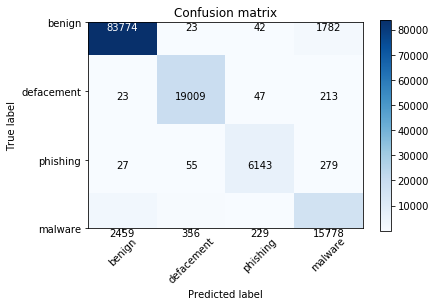

In [36]:
DTClassifier(X_train, y_train, X_test, y_test)

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
def RFClassifier(X_train, y_train, X_test, y_test):
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)

    rfc_pred = rfc.predict(X_test)
    rfc_score = accuracy_score(y_test, rfc_pred)
    
    print(rfc_score)
    
    cm = confusion_matrix(y_test, rfc_pred, labels=[0,1,2,3])
    plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

0.9662697041592764
Confusion matrix, without normalization


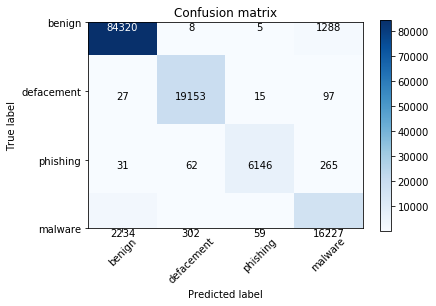

In [39]:
RFClassifier(X_train, y_train, X_test, y_test)

# Support Vector Machine

In [40]:
from sklearn.svm import LinearSVC

In [41]:
def SVC_(X_train, y_train, X_test, y_test):
    s = LinearSVC()
    s.fit(X_train, y_train)

    svc_pred = s.predict(X_test)
    svc_score = accuracy_score(y_test, svc_pred)
    
    print(svc_score)

    cm = confusion_matrix(y_test, svc_pred, labels=[0,1,2,3])
    plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7274702662029039
Confusion matrix, without normalization


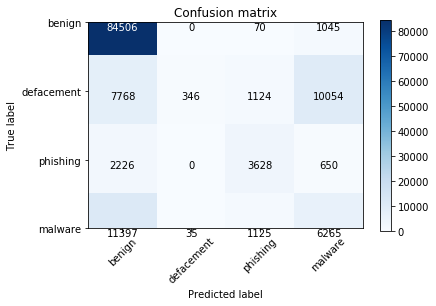

In [42]:
SVC_(X_train, y_train, X_test, y_test)

# Detection using Neural Networks

In [43]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import np_utils, to_categorical

Using TensorFlow backend.


In [44]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (21, )))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu')) 

model.add(Dense(4, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total params: 1,404
Trainable params: 1,404
Non-trainable params: 0
_________________________________________________________________


In [45]:
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [46]:
checkpointer = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpointer])

Train on 520952 samples, validate on 130239 samples
Epoch 1/50
520952/520952 [==============================] - 12s 23us/step - loss: 1.8281 - acc: 0.5252 - val_loss: 1.1389 - val_acc: 0.7974

Epoch 00001: val_acc improved from -inf to 0.79745, saving model to url.h5
Epoch 2/50
520952/520952 [==============================] - 12s 23us/step - loss: 1.0521 - acc: 0.8080 - val_loss: 0.9712 - val_acc: 0.8115

Epoch 00002: val_acc improved from 0.79745 to 0.81154, saving model to url.h5
Epoch 3/50
520952/520952 [==============================] - 12s 23us/step - loss: 0.8340 - acc: 0.8124 - val_loss: 0.6170 - val_acc: 0.8174

Epoch 00003: val_acc improved from 0.81154 to 0.81741, saving model to url.h5
Epoch 4/50
520952/520952 [==============================] - 11s 21us/step - loss: 0.4856 - acc: 0.8404 - val_loss: 0.4039 - val_acc: 0.8547

Epoch 00004: val_acc improved from 0.81741 to 0.85469, saving model to url.h5
Epoch 5/50
520952/520952 [==============================] - 11s 20us/step -


Epoch 00039: val_acc did not improve from 0.92441
Epoch 40/50
520952/520952 [==============================] - 10s 19us/step - loss: 0.2144 - acc: 0.9258 - val_loss: 0.2166 - val_acc: 0.9248

Epoch 00040: val_acc improved from 0.92441 to 0.92483, saving model to url.h5
Epoch 41/50
520952/520952 [==============================] - 10s 19us/step - loss: 0.2133 - acc: 0.9264 - val_loss: 0.2151 - val_acc: 0.9259

Epoch 00041: val_acc improved from 0.92483 to 0.92587, saving model to url.h5
Epoch 42/50
520952/520952 [==============================] - 10s 19us/step - loss: 0.2122 - acc: 0.9267 - val_loss: 0.2146 - val_acc: 0.9249

Epoch 00042: val_acc did not improve from 0.92587
Epoch 43/50
520952/520952 [==============================] - 11s 21us/step - loss: 0.2111 - acc: 0.9273 - val_loss: 0.2154 - val_acc: 0.9246

Epoch 00043: val_acc did not improve from 0.92587
Epoch 44/50
520952/520952 [==============================] - 12s 22us/step - loss: 0.2101 - acc: 0.9275 - val_loss: 0.2127 - 

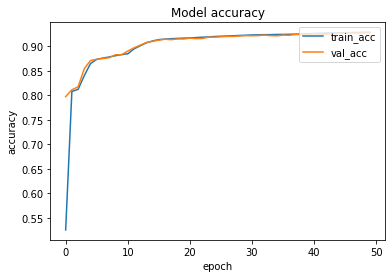

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

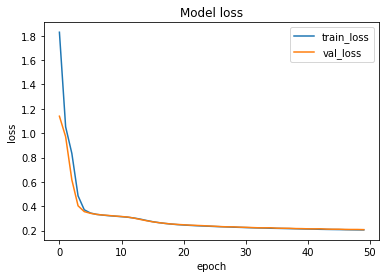

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [49]:
dl_pred = model.predict_classes(X_test)
dl_score = accuracy_score(y_test, dl_pred)

print(dl_score)

0.9278557114228457


Confusion matrix, without normalization


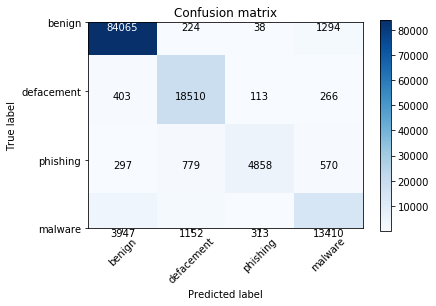

In [50]:
cm = confusion_matrix(y_test, dl_pred, labels=[0,1,2,3])
plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])